In [32]:
from dataset_stats import *


PATH_D_TRAIN=os.getcwd() + "/data/DataTrain/input_tiles/"
PATH_S_TRAIN=os.getcwd()+"/data/DataTrain/output_matrix/"
PATH_D_TEST=os.getcwd()+"/data/DataTest/input_tiles/"
PATH_S_TEST=os.getcwd()+"/data/DataTest/output_matrix/"

directory_train = PATH_D_TRAIN
directory_test = PATH_D_TEST

countries  =['Algérie ⵍⵣⵣⴰⵢⴻⵔ الجزائر', 'Türkmenistan', 'United States']

stations_info_train = get_stations_all_infos_directory(directory_train)
stations_info_test = get_stations_all_infos_directory(directory_test)




## Map of the stations

In [66]:
import folium
from folium import plugins
from folium.features import CustomIcon
import pandas as pd

# Example dictionary
data = stations_info_train
# Convert the dictionary to a DataFrame
df_train = pd.DataFrame.from_dict(data, orient='index')
new_column_names= {column: f'{column}_train' for column in df_train.columns}
df_train = df_train[df_train['country'].isin(countries)]
df_train = df_train.rename(columns=new_column_names)

df_test = pd.DataFrame.from_dict(stations_info_test, orient='index')
df_test = df_test[df_test['country'].isin(countries)]

new_column_names= {column: f'{column}_test' for column in df_test.columns}

df_test = df_test.rename(columns=new_column_names)

df = pd.concat([df_train, df_test], axis=1)
df['lat'] = df['lat_train'].combine_first(df['lat_test'])
df['lon'] = df['lon_train'].combine_first(df['lon_test'])
df['country'] = df['country_train'].combine_first(df['country_test'])
df['state'] = df['state_train'].combine_first(df['state_test'])
df['address'] = df['address_train'].combine_first(df['address_test'])
df = df.drop(columns=['lat_train', 'lat_test', 'lon_train','lon_test', 'country_train', 
                              'country_test', 'state_train', 'state_test', 'address_train', 'address_test'  ])

df.head(5)

,images_train,count_images_train,images_test,count_images_test,lat,lon,country,state,address
32SKA,[S2A_MSIL1C_20171031T101141_N0206_R022_T32SKA_...,1270.0,[S2A_MSIL1C_20180429T101031_N0206_R022_T32SKA_...,26.0,31.596036,5.838411,Algérie ⵍⵣⵣⴰⵢⴻⵔ الجزائر,Ouargla,"Hassi Messaoud ⵃⴰⵙⵉ ⵎⴻⵙⵄⵓⴷ حاسي مسعود, Daïra H..."
31SES,[S2A_MSIL1C_20171106T103221_N0206_R108_T31SES_...,285.0,[S2A_MSIL1C_20180604T103021_N0206_R108_T31SES_...,11.0,32.537355,3.000000,Algérie ⵍⵣⵣⴰⵢⴻⵔ الجزائر,Ghardaïa,"Metlili ⵎⴻⵜⵍⵉⵍⵉ متليلي, Daïra Metlili Châamba,..."
32RLS,[S2A_MSIL1C_20171107T100221_N0206_R122_T32RLS_...,260.0,[S2A_MSIL1C_20171028T100121_N0206_R122_T32RLS_...,8.0,28.010200,6.965927,Algérie ⵍⵣⵣⴰⵢⴻⵔ الجزائر,Illizi,Bordj Omar Driss ⴱⵓⵔⴵ ⵄⵓⵎⴰⵔ ⴷⵔⵉⵙ برج عمر إدريس...
39SYD,[S2A_MSIL1C_20171116T071301_N0206_R106_T39SYD_...,120.0,[S2A_MSIL1C_20171116T071301_N0206_R106_T39SYD_...,10.0,38.826093,53.303925,Türkmenistan,Balkan welaýaty,"Balkanabat şäheri, Balkan welaýaty, Türkmenistan"
31SGR,[S2A_MSIL1C_20180422T102031_N0206_R065_T31SGR_...,475.0,[S2A_MSIL1C_20190703T101031_N0207_R022_T31SGR_...,15.0,31.617775,5.108486,Algérie ⵍⵣⵣⴰⵢⴻⵔ الجزائر,Ouargla,"Rouissat ⵔⵡⵉⵙⴰⵜ الرويسات, Daïra Ouargla, Ouarg..."



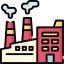
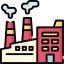
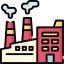
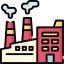
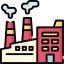
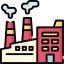
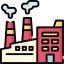
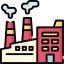
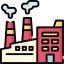
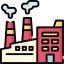
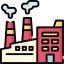
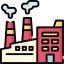
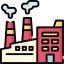
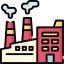
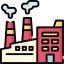
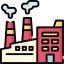
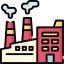
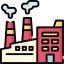
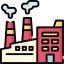
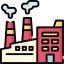
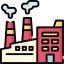
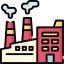

In [64]:
# let's start again with a clean copy of the map of San Francisco
latitudes = list(df['lat'])
longitudes = list(df['lon'])

methane_stations_map = folium.Map(location = [31.59603567113855, 5.83841112451701], zoom_start = 2)

# instantiate a mark cluster object for the incidents in the dataframe
ch4_stations = plugins.MarkerCluster().add_to(methane_stations_map)

# loop through the dataframe and add each data point to the mark cluster
for station,lat, lng, state,count_images_train, count_images_test  in zip(df.index, df.lat, df.lon, df.state, df.count_images_train, df.count_images_test):
    icon_path = r"./factory.png"
    icon = CustomIcon(
        icon_image=icon_path,
        icon_size=(32, 32),
        icon_anchor=(10, 30),
    )
    iframe = folium.IFrame('Station#:' + str(station) + '<br>' + 'State: ' + state + '<br>' + 'Number images Train: ' + str(count_images_train) + '<br>' + 'Number images Test: ' + str(count_images_test))
    popup = folium.Popup(iframe, min_width=200, max_width=200, height = 150)

    folium.Marker(
        location=[lat, lng],
        icon = icon,
        popup= popup,
    ).add_to(ch4_stations)

# display map
methane_stations_map

In [115]:
methane_stations_map.save('map.html')

## Distribtion of the train and test

### Distribution of train images

In [112]:
import pandas as pd
import plotly.express as px


import pandas as pd
import plotly.express as px

def flatten_data(dict_images_by_state_train):
    # Flatten the dictionary and calculate the count of images
    flattened_data = []
    for country, states in dict_images_by_state_train.items():
        for state, images in states.items():
            if  isinstance(images, list):
                count_images = len(images)
            else: 
                count_images = images
            flattened_data.append({
                'country': country,
                'state': state,
                'count_images': count_images
            })
    return flattened_data

def stacked_bar_images_bycountry_state(images_by_state_train, title = "Count of Images by Country and State (Train set)"):
    # Check if images_by_state_train is not a list
    if not isinstance(images_by_state_train, list):  
        flattened_data = flatten_data(images_by_state_train)
    else:
        flattened_data = images_by_state_train
    
    # Convert to DataFrame
    df = pd.DataFrame(flattened_data)
    print('Columns:', df.columns)

    # Filter by countries if provided
    df = df[df['country'].isin(countries)]
    
    # Create a stacked bar chart
    fig = px.bar(df, x='country', y='count_images', color='state', 
                title=title, 
                labels={'count_images': 'Count of Images'}, barmode='stack')

    fig.show()

dict_images_by_state_train = images_by_country_and_state(stations_info_train, print_results=False)
stacked_bar_images_bycountry_state(dict_images_by_state_train)

Columns: Index(['country', 'state', 'count_images'], dtype='object')


## Distribution in the Test set

In [113]:
dict_images_by_state_test = images_by_country_and_state(stations_info_test, print_results=False,
                                                       )
stacked_bar_images_bycountry_state(dict_images_by_state_test,  title = "Count of Images by Country and State (Test set)")

Columns: Index(['country', 'state', 'count_images'], dtype='object')


## Subdataset: Train

In [114]:
percentages_train_smaller = { 'Algérie ⵍⵣⵣⴰⵢⴻⵔ الجزائر' : 
                    {
                        'Ouargla' : 20, 
                        'Ghardaïa' : 20, 
                        'Illizi' : 20, 
                        'Adrar' : 10 
                        }, 
                    'Türkmenistan' : {'Balkan welaýaty' : 30,
                                    'Lebap welaýaty' : 20, 
                                    'Mary welaýaty' : 20},
                    'United States' : {'Texas': 35, 
                                    'Colorado': 15, 
                                    'Georgia': 5, 
                                    'Kansas': 5}
                    }

stacked_bar_images_bycountry_state(percentages_train_smaller,  title = "Count of Images by Country and State (Train subdataset)")



Columns: Index(['country', 'state', 'count_images'], dtype='object')


## Input images visualizations

In [ ]:
import rasterio as rio
import numpy as np
import matplotlib.pyplot as plt

def plot_image_channels(input_image_path):
    imgfile = rio.open(input_image_path, nodata = 0)
    bands= [1,2,3,4,5,6,7,8,9,10,11,12,13]
    imgdata = np.array([imgfile.read(i) for i in bands])

    fig, axs = plt.subplots(5, 3, figsize=(10, 12))
    row =0 
    col= 0
    for band in bands: 

        # Create a figure with 1 row and 2 columns for side-by-side plots
        # Plot the input image (PNG)
        axs[row][col].imshow(imgdata[band-1], cmap='gray', interpolation='nearest')
        axs[row][col].set_title(f'Input Image - Band {band} ')
        axs[row][col].axis('off')  # Hide the axis
        col = col+1
        if band % 3 ==0: 
            row= row+1
            col=0
        
    # Show the plots
    plt.tight_layout()
    plt.show()

input_image_path = ''